In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import missingno as msno
from collections import Counter
from itertools import chain, combinations
import sklearn as sk

# SVM

In [2]:
data0 = pd.read_csv("newdata3.csv", engine='python')
data1 = pd.read_csv("imputed_dataset_1.csv", engine='python')
data1.head()
data2 = pd.read_csv("imputed_dataset_2.csv", engine='python')
data2.head()
data3 = pd.read_csv("imputed_dataset_3.csv", engine='python')
data3.head()
data4 = pd.read_csv("imputed_dataset_4.csv", engine='python')
data4.head()
data5 = pd.read_csv("imputed_dataset_5.csv", engine='python')

1. Train an SVM (with a specific Kernel), plot the training and validation learning curves. You may need to subsample the dataset if SVM training is taking too long. Do you see any signs of overfitting? Interpret and discuss your results. (1 mark)
2. What are your results in the testing dataset? Interpret and discuss your results. (2 marks)
3. How sensitive is this method to different hyperparameters? For example the different types of kernel (e.g. linear, RBF, etc.). Make use of plots (e.g. performance on test dataset as a function of different hyperparameters) to help you discuss this point. (5 marks)
4. Plot decision boundaries and discuss their relevance. (2 marks)

## Prepare the data:

Separate target from data.

In [3]:
X = data5.drop(['has_dep_diag'],axis=1).drop(['secd_diag'],axis=1).drop(['prim_diag'],axis=1).drop(['dep_score'],axis=1).drop(['dep_thoughts'],axis=1).drop(['panic_score'], axis=1)
print(X.shape)
Y = np.column_stack((data5['has_dep_diag'], data5['secd_diag'], data5['prim_diag'], data5['dep_score'], data5['dep_thoughts']))
print(Y.shape)

(13734, 37)
(13734, 5)


Randomly shuffle the dataset.

In [4]:
from random import shuffle

def shuffle_dataset(N, X, y, X_shuffled, y_shuffled):
    ind_list = [i for i in range(N)]
    shuffle(ind_list)
    X_shuffled  = X.iloc[ind_list]
    y_shuffled = y.iloc[ind_list]

In [5]:
X_shuffled = X
y_shuffled = Y
shuffle_dataset(13734, pd. DataFrame(X), pd. DataFrame(Y), pd. DataFrame(X_shuffled), pd. DataFrame(y_shuffled))

Train-test split.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled,test_size=0.3, random_state=40)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(9613, 37)
(4121, 37)
(9613, 5)
(4121, 5)


Reduce the dataset.

In [7]:
X_train_reduced, y_train_reduced = X_train[0:400], y_train[0:400]
X_test_reduced, y_test_reduced = X_test[0:200], y_test[0:200]
print(X_train_reduced.shape); print(X_test_reduced.shape)
print(y_train_reduced.shape); print(y_test_reduced.shape)

(400, 37)
(200, 37)
(400, 5)
(200, 5)


### Warning
Normalizing data

For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is important to get good prediction.

## Train model:
Imputed dataset 5, for has_dep_diag 

In [8]:
from sklearn import svm
from sklearn.svm import SVC

Basic SVM, with accuracy and f1-score:

In [9]:
svm = SVC(C=0.1, gamma='scale', kernel='linear')
svm.fit(X_train, y_train[:,0])
print(f'SVM classifier accuracy: {svm.score(X_train, y_train[:,0])}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test[:,0])}')

SVM classifier accuracy: 0.9679600540934151
SVM classifier accuracy - test set: 0.9694248968696918


In [10]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = svm.predict(X_train)
print(f1_score(y_pred, y_train[:,0], average = "macro"))
y_pred_test = svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,0], average = "macro"))
##micro same as accuracy
print(f1_score(y_pred, y_train[:,0], average = "micro"))
print(f1_score(y_pred_test, y_test[:,0], average = "micro"))

0.5075785697844445
0.500048142100074
0.9679600540934151
0.9694248968696917


For diff hyperparameters: here the train set accuracy is lower than the test one as it should be.

In [11]:
svm = SVC(C=1, gamma = 'auto')
svm.fit(X_train, y_train[:,0])
print(f'SVM classifier accuracy: {svm.score(X_train, y_train[:,0])}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test[:,0])}')
y_pred = svm.predict(X_train)
print(f1_score(y_pred, y_train[:,0], average = "macro"))
y_pred_test = svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,0], average = "macro"))

SVM classifier accuracy: 0.9849162592322896
SVM classifier accuracy - test set: 0.9728221305508372
0.8197476647055819
0.49311193111931123


In [ ]:
#don't run, takes AGES
#svm = SVC(C=1, gamma = 'auto', kernel = 'poly', degree = 3)
#svm.fit(X_train_reduced, y_train_reduced[:,0])
#print(f'SVM classifier accuracy: {svm.score(X_train_reduced, y_train_reduced[:,0])}')
#print(f'SVM classifier accuracy - test set: {svm.score(X_test_reduced, y_test_reduced[:,0])}')

Sigmoid kernel:

In [14]:
svm = SVC(C=1, gamma = 'auto', kernel = 'sigmoid')
svm.fit(X_train, y_train[:,0])
print(f'SVM classifier accuracy: {svm.score(X_train, y_train[:,0])}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test[:,0])}')
y_pred = svm.predict(X_train)
print(f1_score(y_pred, y_train[:,0], average = "macro"))
y_pred_test = svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,0], average = "macro"))

SVM classifier accuracy: 0.9710808280453552
SVM classifier accuracy - test set: 0.9728221305508372
0.492664133417775
0.49311193111931123


Rbf kernel, all the other targets:

In [30]:
svm = SVC(C=4)
svm.fit(X_train, y_train[:,0])
print(f'SVM classifier accuracy: {svm.score(X_train, y_train[:,0])}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test[:,0])}')
y_pred = svm.predict(X_train)
print(f1_score(y_pred, y_train[:,0], average = "macro"))
y_pred_test = svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,0], average = "macro"))

SVM classifier accuracy: 0.9710808280453552
SVM classifier accuracy - test set: 0.9728221305508372
0.492664133417775
0.49311193111931123


In [21]:
svm = SVC(C=4)
svm.fit(X_train, y_train[:,1])
print(f'SVM classifier accuracy: {svm.score(X_train, y_train[:,1])}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test[:,1])}')
y_pred = svm.predict(X_train)
print(f1_score(y_pred, y_train[:,1], average = "macro"))
y_pred_test = svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,1], average = "macro"))

SVM classifier accuracy: 0.5681889108498908
SVM classifier accuracy - test set: 0.5799563212812424
0.07246434494195689
0.0917677776071264


In [22]:
svm = SVC(C=4)
svm.fit(X_train, y_train[:,2])
print(f'SVM classifier accuracy: {svm.score(X_train, y_train[:,2])}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test[:,2])}')
y_pred = svm.predict(X_train)
print(f1_score(y_pred, y_train[:,2], average = "macro"))
y_pred_test = svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,2], average = "macro"))

SVM classifier accuracy: 0.5649641110995527
SVM classifier accuracy - test set: 0.5673380247512739
0.05553964780234389
0.05568854430907381


In [23]:
svm = SVC(C=4)
svm.fit(X_train, y_train[:,3])
print(f'SVM classifier accuracy: {svm.score(X_train, y_train[:,3])}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test[:,3])}')
y_pred = svm.predict(X_train)
print(f1_score(y_pred, y_train[:,3], average = "macro"))
y_pred_test = svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,3], average = "macro"))

SVM classifier accuracy: 0.5582024342036825
SVM classifier accuracy - test set: 0.5624848337782091
0.14329394485613195
0.1439975151421028


In [18]:
svm = SVC(C=4)
svm.fit(X_train, y_train[:,4])
print(f'SVM classifier accuracy: {svm.score(X_train, y_train[:,4])}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test[:,4])}')
y_pred = svm.predict(X_train)
print(f1_score(y_pred, y_train[:,4], average = "macro"))
y_pred_test = svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,4], average = "macro"))

SVM classifier accuracy: 0.47082076354936025
SVM classifier accuracy - test set: 0.48022324678476097
0.0
0.0


## Exploration:

In [11]:
from sklearn.model_selection import learning_curve

#plot learning curve function from the labs
def plot_learning_curve(n, est, xs, ys, title):
    train_sizes, train_scores, valid_scores = learning_curve(estimator = est, X = xs, y = ys, cv = n)

    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy')
    plt.plot(train_sizes, valid_mean, color='green', label='Validation Accuracy')

    plt.xlabel('Dataset size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()


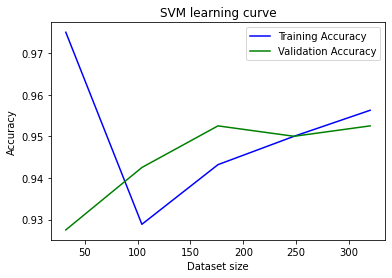

In [12]:
plot_learning_curve(5, svm,X_train_reduced, y_train_reduced[:,0], 'SVM learning curve')

In [13]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(est, X, y, p_name, p_range, title):
    train_scores, test_scores = validation_curve(estimator=est,
                                             X=X, y=y,
                                             cv=5,
    param_name=p_name, param_range=p_range)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(p_range, train_mean,
             color='blue', label='Training Accuracy')
    plt.plot(p_range, test_mean,
             color='green', label='Validation Accuracy')
    plt.xlabel(p_name)
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.grid()
    plt.show()

In [ ]:
plot_validation_curve(svm, X_train_reduced, y_train_reduced[:,0], 'C', list(np.arange(0.0, 10, 0.1))
, "SVM validation curve")

/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"


## Tune hypermarameters:

In [57]:
##on accuracy

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.0, 0.1,1, 5, 10, 100], 
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
tuned_svm = GridSearchCV(svm, param_grid, cv = 5, scoring='accuracy', verbose = 2, n_jobs=-1)
tuned_svm.fit(X_train_reduced, y_train_reduced[:,0])

params = tuned_svm.best_params_

print(params)
print(tuned_svm.score(X_train,y_train[:,0]))
print(tuned_svm.score(X_test,y_test[:,0]))
y_pred = tuned_svm.predict(X_train)
print(f1_score(y_pred, y_train[:,0], average = "macro"))
y_pred_test = tuned_svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,0], average = "macro"))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
## on f1 macro
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.0, 0.1,1, 5, 10, 100], 
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
tuned_svm = GridSearchCV(svm, param_grid, cv = 5, scoring='f1_macro' , verbose = 2, n_jobs=-1)
tuned_svm.fit(X_train_reduced, y_train_reduced[:,0])

params = tuned_svm.best_params_

print(params)
print(tuned_svm.score(X_train,y_train[:,0]))
print(tuned_svm.score(X_test,y_test[:,0]))
y_pred = tuned_svm.predict(X_train)
print(f1_score(y_pred, y_train[:,0], average = "macro"))
y_pred_test = tuned_svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,0], average = "macro"))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s


## NuSVC

In [23]:
from sklearn.svm import NuSVC
## the largst nu I was allowed
svm = NuSVC(nu = 0.05)
svm.fit(X_train, y_train[:,0])

print(f'SVM classifier accuracy: {svm.score(X_train, y_train[:,0])}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test[:,0])}')
y_pred = svm.predict(X_train)
print(f1_score(y_pred, y_train[:,0], average = "macro"))
y_pred_test = svm.predict(X_test)
print(f1_score(y_pred_test, y_test[:,0], average = "macro"))

SVM classifier accuracy: 0.6491209820035369
SVM classifier accuracy - test set: 0.6277602523659306
0.42074505122893324
0.40795109725853945


## SVC on the deataset with reduced dimensionality (PCA)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

svm_pca = SVC(C=0.1, gamma='scale', kernel='linear')
svm_pca.fit(X_pca, y_train[:,0])
print(f'SVM classifier accuracy: {svm_pca.score(X_pca, y_train[:,0])}')
print(f'SVM classifier accuracy - test set: {svm_pca.score(X_test_pca, y_test[:,0])}')
y_pred = svm_pca.predict(X_pca)
print(f1_score(y_pred, y_train[:,0], average = "macro"))
y_pred_test = svm_pca.predict(X_test_pca)
print(f1_score(y_pred_test, y_test[:,0], average = "macro"))

SVM classifier accuracy: 0.9710808280453552
SVM classifier accuracy - test set: 0.9728221305508372
0.492664133417775
0.49311193111931123
